# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [19]:
n = 1000
x = np.round(np.random.rand(n))

y = np.zeros(n)

for i in np.arange(n):
    if np.random.rand(1) < .5:
        y[i] = x[i]
            
np.corrcoef(x,y)

array([[1.        , 0.59529809],
       [0.59529809, 1.        ]])

## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [21]:
def entropy(x):
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

In [22]:
def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """

    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

In [38]:
N = 1000   # number of data points
Hxt = entropy(x=x)
Hxyt = condEntropy(x=x,y=y)
MIt = Hxt-Hxyt
print('MI is: ', Hxt-Hxyt)

MI is:  0.0002369146743368411


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

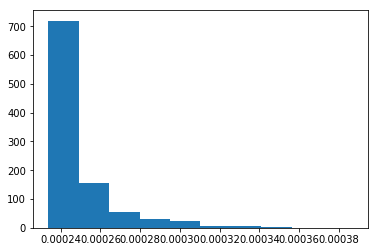

In [40]:
num_shuffle = 1000
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)
Hx = np.zeros(num_shuffle)
Hxy = np.zeros(num_shuffle)
MI = np.zeros(num_shuffle)

for i in np.arange(num_shuffle):
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            tmp0[j] = x[j]
            tmp1[j] = y[j]
        else:
            tmp0[j] = y[j]
            tmp1[j] = x[j]
    Hx[i] = entropy(x=tmp0)
    Hxy[i] = condEntropy(x=tmp0,y=tmp1)
    MI[i] = Hx[i] - Hxy[i]

#MI = Hx - Hxy

plt.hist(MI)
plt.show()

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [41]:
MIt-np.mean(MI)

-1.0329021582514803e-05